# The Naive Bayes Algorithm

**OBJECTIVES**

- Explain $P(C_i, X_j)$
- Explain $P(X_j|C_i)$
- Relate the above to $P(C_i|X_j)$ through Bayes Rule
- Explain the Maximum aposteriori question
- Explain why this algorithm is *NAIVE*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
X = cancer.data
y = cancer.target

In [5]:
cdf = pd.DataFrame(X, columns = cancer.feature_names)

In [6]:
cdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cdf['target'] = y

In [8]:
groups = cdf.groupby('target')['mean area']

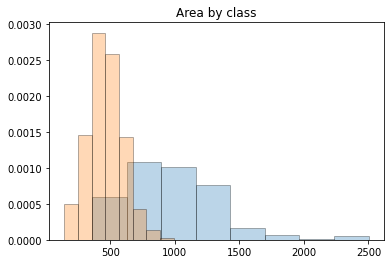

In [9]:
for group in groups:
    plt.hist(group[1], bins = 8, alpha = 0.3, density = True, edgecolor = 'black')
plt.title('Area by class');

- Given that the radius is 200, what class would you predict?
- Given that the radius is 2000, what class would you predict?
- Given that the radius is 500, can you explain a way to determine the probability this is a 0?  A 1?

**JOINT PROBABILITY**: 

The probability that something is a 500 and class 1 (here we are looking at all the data); 


$$P(C_1,500)$$

**CONDITIONAL PROBABILITY**

Given a tumor is class 1, what is the probability it has area 500?

$$P(500 | C_1)$$

**BAYES RULE**

Relates the above through the equation:

$$P(C_i, X_j) = P(X_j | C_i)P(C_i)$$

or 

$$P(C_i, X_j) = P( C_i|X_j)P(X_j)$$

Note the equality, set em equal, solve for $P(C_i | X_j)$ and voila:

$$P(C_i | X_j) = \frac{P(X_j | C_i)P(C_i)}{P(X_j)}$$

Big idea is we can learn the right side of this from the data, but note that we would have results for each class.  

**MAXIMUM APOSTERIOR**

$$P(C_i | X) > P(C_j | X) ~ \forall ~ i \neq j$$

### Naive Bayes

Make a simplifying assumption about independence and actually use

$$P(C_i) \prod_{k} P(X_j^k = a_k | C_i)$$

### A Basic Example

In [10]:
deadline = ['urgent','urgent','near', 'none', 'none', 'none', 'near', 'near', 'near','urgent']
party = ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no']
lazy = ['yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no']
activity = ['party', 'study', 'party', 'party', 'pub', 'party', 'study', 'tv', 'party', 'study']

In [11]:
df = pd.DataFrame({'deadline': deadline, 
                  'party': party,
                  'lazy': lazy,
                  'activity': activity})

In [12]:
df

,deadline,party,lazy,activity
0,urgent,yes,yes,party
1,urgent,no,yes,study
2,near,yes,yes,party
3,none,yes,no,party
4,none,no,yes,pub
5,none,yes,no,party
6,near,no,no,study
7,near,no,yes,tv
8,near,yes,yes,party
9,urgent,no,no,study


**EXAMPLE**: Suppose you have a deadline, non are urgent, no party, and you are lazy.

- $P(party) \times P(near | party) \times P(no party | party) \times P(lazy | party)$
- $P(study) \times P(near | study) \times p(noparty | study) \times P(lazy | study)$
- $P(pub) \times P(near | pub) \times P(noparty | pub) \times P(lazy | pub)$
- $P(tv) \times P(near | tv) \times P(noparty | tv) \times P(lazy |tv)$

------

Naive Bayes --> Compute these and determine the maximum aposterior solution!

**BONUS**: Do it with a machine!

In [13]:
pd.factorize(df['activity'])

(array([0, 1, 0, 0, 2, 0, 1, 3, 0, 1]),
 Index(['party', 'study', 'pub', 'tv'], dtype='object'))

In [14]:
df['activity'], names = pd.factorize(df['activity'])

In [15]:
pd.factorize(df['activity'])

(array([0, 1, 0, 0, 2, 0, 1, 3, 0, 1]),
 Int64Index([0, 1, 2, 3], dtype='int64'))

In [16]:
dummy_df = pd.get_dummies(df)

In [17]:
dummy_df

,activity,deadline_near,deadline_none,deadline_urgent,party_no,party_yes,lazy_no,lazy_yes
0,0,0,0,1,0,1,0,1
1,1,0,0,1,1,0,0,1
2,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,1,0
4,2,0,1,0,1,0,0,1
5,0,0,1,0,0,1,1,0
6,1,1,0,0,1,0,1,0
7,3,1,0,0,1,0,0,1
8,0,1,0,0,0,1,0,1
9,1,0,0,1,1,0,1,0


In [18]:
nbayes = MultinomialNB(alpha = 0.00001)

In [19]:
y = df['activity']
X = dummy_df.drop('activity', axis = 1)

In [20]:
nbayes.fit(X, y)

MultinomialNB(alpha=1e-05)

In [21]:
dummy_df

,activity,deadline_near,deadline_none,deadline_urgent,party_no,party_yes,lazy_no,lazy_yes
0,0,0,0,1,0,1,0,1
1,1,0,0,1,1,0,0,1
2,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,1,0
4,2,0,1,0,1,0,0,1
5,0,0,1,0,0,1,1,0
6,1,1,0,0,1,0,1,0
7,3,1,0,0,1,0,0,1
8,0,1,0,0,0,1,0,1
9,1,0,0,1,1,0,1,0


In [22]:
#what is the input?
xt = np.array([[1, 0, 0, 0, 1, 1, 0 ]])

In [23]:
#make a prediction
nbayes.predict(xt)

array([0])

In [24]:
#what is this?
names[0]

'party'

### Returning to the Spam Data

In [25]:
#load the data
spam = pd.read_csv('data/sms.csv', index_col=0)

In [26]:
#examine data
spam.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
#prepare target
y = np.where(spam['class'] == 'spam', 1, 0)

In [28]:
#extract feature array
X = spam['text']

In [29]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4827,  747]))

In [30]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [31]:
#count vectorizer
cvect = CountVectorizer(stop_words='english')

In [32]:
#naive bayes
nbayes = MultinomialNB()

In [33]:
#pipeline
pipe = make_pipeline(cvect, nbayes)

In [34]:
#parameters -- let's search for:
#max features
#min_df - int
#max_df - floats
params = {'countvectorizer__max_features': [50, 100, 150, 200],
         'countvectorizer__min_df': [1, 2, 6, 10],
         'countvectorizer__max_df': [0.5, 0.8, .9],
         'countvectorizer__ngram_range': [(1, 1), (2, 2)]}

In [35]:
#grid
grid = GridSearchCV(pipe, param_grid=params)

In [36]:
#fit it
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__max_df': [0.5, 0.8, 0.9],
                         'countvectorizer__max_features': [50, 100, 150, 200],
                         'countvectorizer__min_df': [1, 2, 6, 10],
                         'countvectorizer__ngram_range': [(1, 1), (2, 2)]})

<AxesSubplot:>

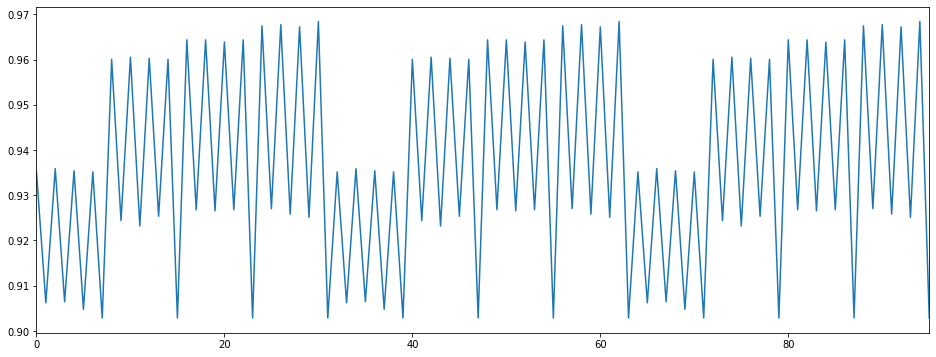

In [37]:
#results
pd.DataFrame(grid.cv_results_)['mean_test_score'].plot(figsize = (16, 6))

In [38]:
#examine the best parameters
grid.best_params_

{'countvectorizer__max_df': 0.5,
 'countvectorizer__max_features': 200,
 'countvectorizer__min_df': 10,
 'countvectorizer__ngram_range': (1, 1)}

In [41]:
grid.score(X_test, y_test)

0.9770444763271162

In [42]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1207,  187]))

In [43]:
1207/(1207 + 187)

0.8658536585365854

### SpaCy and Word Vectors

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp('This is a sentence about natural language processing at Google in New York.')

In [ ]:
doc

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob('This is a sentence about natural language processing at Google in New York.')

In [ ]:
blob.ngrams()

In [ ]:
for word in doc:
    print(word.text, word.pos_, word.lemma_)

In [ ]:
word1 = doc[0]

In [ ]:
from spacy import displacy

displacy.render(doc, style = 'dep', jupyter = True)

In [ ]:
displacy.render(doc, style = 'ent', jupyter = True)

In [ ]:
spam.head(10)

In [ ]:
sents = spam.iloc[:10]['text'].values

In [ ]:
sents

In [ ]:
sent = nlp(sents[0])

In [ ]:
sent.has_vector

In [ ]:
sent.vector[:10]

In [ ]:
sent.vector.shape

In [ ]:
data_list = [nlp(doc).vector.reshape(1, -1) for doc in sents]

In [ ]:
data = np.concatenate(data_list)

In [ ]:
type(data)

In [ ]:
data

In [ ]:
y = spam.iloc[:10]['class']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
data.shape

In [ ]:
clf.fit(data, y)

In [ ]:
clf.score(data, y)

#### Custom Transformer

In their blog post [here](https://lvngd.com/blog/spacy-word-vectors-as-features-in-scikit-learn/), Christina suggests the following transformer to live in a pipeline.  Note that we won't be able to use Naive Bayes here due to the negative values returned from the word vectors.

```python
import numpy as np
import spacy
from sklearn.base import BaseEstimator, TransformerMixin

class WordVectorTransformer(TransformerMixin,BaseEstimator):
    def __init__(self, model="en_core_web_lg"):
        self.model = model

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(doc).vector.reshape(1,-1) for doc in X])
```